# Day 14: Final Project - Analyzing Weather Data

Congratulations, you've made it to the final day! This project is designed to bring together all the skills you've developed over the past two weeks. You will perform a complete analysis of a generated weather dataset, from loading and cleaning to visualization and statistical analysis.

**Goal:** Analyze a year's worth of weather data for a fictional city to uncover trends, relationships, and seasonal patterns.

### Step 0: Import Libraries

Let's start by importing all the libraries we'll need for this project.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize

# Set default plot style
plt.style.use("seaborn-v0_8-whitegrid")

---

### Step 1: Generate and Load the Data

To make this notebook self-contained, we will generate our own weather dataset for the year 2025. This code simulates daily temperature, precipitation, and wind speed with seasonal patterns and some random noise.

In [5]:
np.random.seed(0)
dates = pd.date_range(start="2025-01-01", end="2025-12-31", freq="D")
days_in_year = len(dates)

# Temperature (Celsius): Seasonal sine wave + noise
day_of_year = dates.dayofyear.to_numpy()  # convert to NumPy array
temp_seasonal = 20 * np.sin(2 * np.pi * (day_of_year - 80) / 365) + 10
temp_noise = np.random.normal(0, 3, days_in_year)
temperature = temp_seasonal + temp_noise

# Precipitation (mm): More likely in colder months
precipitation_chance = 0.5 - (temperature - temperature.mean()) / 50
precipitation = np.random.gamma(1, 5, days_in_year) * (
    np.random.rand(days_in_year) < precipitation_chance
)
precipitation[precipitation < 0] = 0


# Wind Speed (km/h)
wind_speed = np.random.gamma(3, 5, days_in_year)

# Create DataFrame
weather_df = pd.DataFrame(
    {
        "temperature": temperature,
        "precipitation": precipitation,
        "wind_speed": wind_speed,
    },
    index=dates,
)

# Introduce some missing values to practice cleaning
for _ in range(20):
    weather_df.iloc[np.random.randint(0, days_in_year), np.random.randint(0, 3)] = (
        np.nan
    )

print("Data generated successfully!")

Data generated successfully!


### Step 2: Data Exploration and Cleaning

First, let's get a feel for our dataset and handle any issues like missing values.

**Exercise 2.1:** Use `.info()` and `.describe()` to inspect the DataFrame. How many missing values are in each column?

In [6]:
# Your code here
weather_df.info()
# display(weather_df.describe())
weather_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2025-01-01 to 2025-12-31
Freq: D
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    358 non-null    float64
 1   precipitation  361 non-null    float64
 2   wind_speed     356 non-null    float64
dtypes: float64(3)
memory usage: 11.4 KB


,temperature,precipitation,wind_speed
2025-01-01,-4.264810,0.000000,14.690942
2025-01-02,-8.281537,1.732167,17.774998
2025-01-03,-6.465064,0.826465,NaN
2025-01-04,-2.592119,2.702014,5.338201
2025-01-05,-3.619922,0.703726,13.411635


**Solution 2.1:**

In [ ]:
print("DataFrame Info:")
weather_df.info()
print("\n--- Descriptive Statistics ---")
display(weather_df.describe())

**Exercise 2.2:** Fill the missing values. A good strategy is to use interpolation, which will estimate the missing values based on the data before and after. Use the `.interpolate()` method on the DataFrame.

In [7]:
# Your code here
weather_df_cleaned = weather_df.interpolate(method="time")
display(weather_df_cleaned.head())
weather_df_cleaned.info()

,temperature,precipitation,wind_speed
2025-01-01,-4.264810,0.000000,14.690942
2025-01-02,-8.281537,1.732167,17.774998
2025-01-03,-6.465064,0.826465,11.556599
2025-01-04,-2.592119,2.702014,5.338201
2025-01-05,-3.619922,0.703726,13.411635


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2025-01-01 to 2025-12-31
Freq: D
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    365 non-null    float64
 1   precipitation  365 non-null    float64
 2   wind_speed     365 non-null    float64
dtypes: float64(3)
memory usage: 11.4 KB


**Solution 2.2:**

In [8]:
# Solution
weather_df_cleaned = weather_df.interpolate(method="time")

# Verify that there are no more missing values
print("Missing values after interpolation:")
print(weather_df_cleaned.isnull().sum())

Missing values after interpolation:
temperature      0
precipitation    0
wind_speed       0
dtype: int64


---

### Step 3: Exploratory Data Analysis (EDA) and Visualization

Now for the fun part! Let's create a dashboard of plots to understand our weather data.

**Exercise 3.1:** Create a 2x2 subplot figure to visualize the following:
1.  **Top-Left:** A line plot of the daily temperature over the entire year.
2.  **Top-Right:** A histogram of the wind speed distribution.
3.  **Bottom-Left:** A scatter plot of temperature vs. precipitation. Is there a visible relationship?
4.  **Bottom-Right:** A plot of the total monthly precipitation (resample the daily data to monthly `'ME'` and sum it).

Give each subplot a title and add a main title to the entire figure.

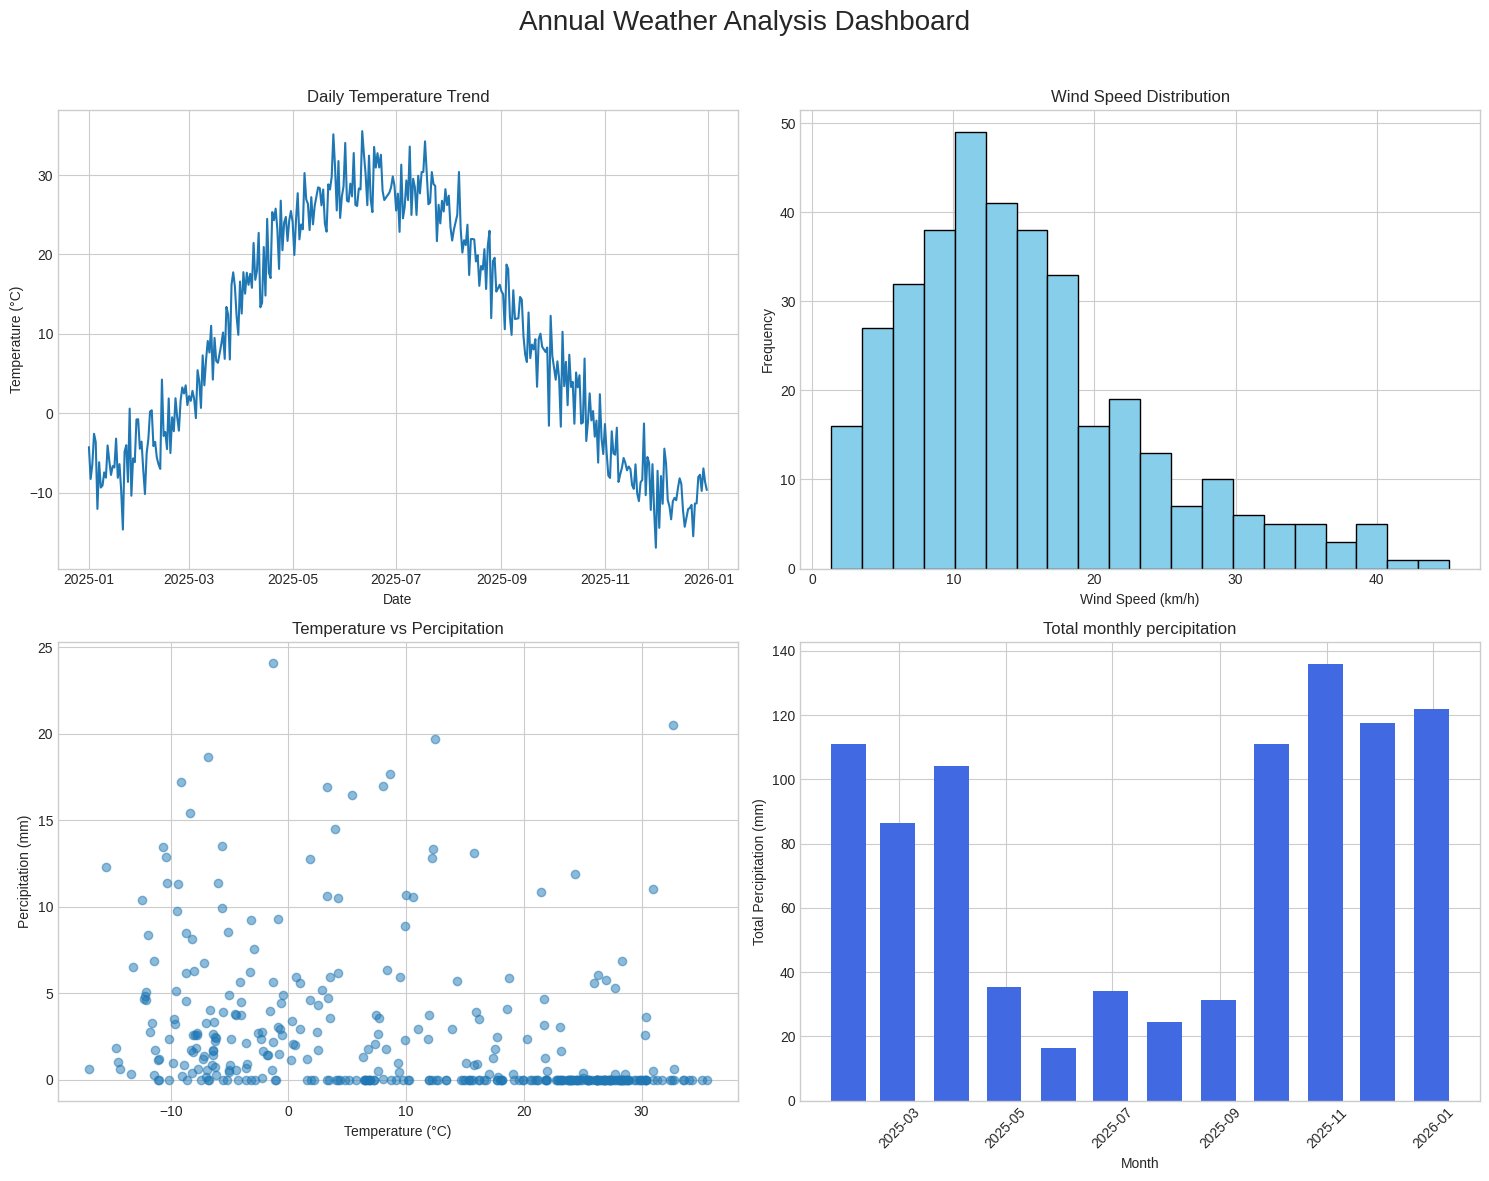

In [24]:
# Your code here
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Annual Weather Analysis Dashboard", fontsize=20)

# Temperature Line Plot
ax[0, 0].plot(weather_df_cleaned.index, weather_df_cleaned["temperature"])
ax[0, 0].set_title("Daily Temperature Trend")
ax[0, 0].set_xlabel("Date")
ax[0, 0].set_ylabel("Temperature (°C)")

# Wind speed histogram
ax[0, 1].hist(
    weather_df_cleaned["wind_speed"], bins=20, color="skyblue", edgecolor="black"
)
ax[0, 1].set_title("Wind Speed Distribution")
ax[0, 1].set_xlabel("Wind Speed (km/h)")
ax[0, 1].set_ylabel("Frequency")

# Temperature vs Percipitation
ax[1, 0].scatter(
    weather_df_cleaned["temperature"], weather_df_cleaned["precipitation"], alpha=0.5
)
ax[1, 0].set_title("Temperature vs Percipitation")
ax[1, 0].set_xlabel("Temperature (°C)")
ax[1, 0].set_ylabel("Percipitation (mm)")

# Total monthly percipitation
monthly_precip = weather_df_cleaned["precipitation"].resample("ME").sum()
ax[1, 1].bar(monthly_precip.index, monthly_precip.values, width=20, color="royalblue")
ax[1, 1].set_title("Total monthly percipitation")
ax[1, 1].set_xlabel("Month")
ax[1, 1].set_ylabel("Total Percipitation (mm)")
ax[1, 1].tick_params(axis="x", rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Solution 3.1:**

In [ ]:
# Solution
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Annual Weather Analysis Dashboard", fontsize=20)

# 1. Temperature Line Plot
ax[0, 0].plot(weather_df_cleaned.index, weather_df_cleaned["temperature"])
ax[0, 0].set_title("Daily Temperature Trend")
ax[0, 0].set_xlabel("Date")
ax[0, 0].set_ylabel("Temperature (°C)")

# 2. Wind Speed Histogram
ax[0, 1].hist(
    weather_df_cleaned["wind_speed"], bins=20, color="skyblue", edgecolor="black"
)
ax[0, 1].set_title("Wind Speed Distribution")
ax[0, 1].set_xlabel("Wind Speed (km/h)")
ax[0, 1].set_ylabel("Frequency")

# 3. Temperature vs. Precipitation Scatter Plot
ax[1, 0].scatter(
    weather_df_cleaned["temperature"], weather_df_cleaned["precipitation"], alpha=0.5
)
ax[1, 0].set_title("Temperature vs. Precipitation")
ax[1, 0].set_xlabel("Temperature (°C)")
ax[1, 0].set_ylabel("Precipitation (mm)")

# 4. Monthly Precipitation Bar Plot
monthly_precip = weather_df_cleaned["precipitation"].resample("ME").sum()
ax[1, 1].bar(monthly_precip.index, monthly_precip.values, width=20, color="royalblue")
ax[1, 1].set_title("Total Monthly Precipitation")
ax[1, 1].set_xlabel("Month")
ax[1, 1].set_ylabel("Total Precipitation (mm)")
ax[1, 1].tick_params(axis="x", rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

---

### Step 4: Statistical Analysis with SciPy

Let's test a hypothesis: Are days with precipitation significantly cooler than days without precipitation?

**Exercise 4.1:**
1.  Create two new Series: one with temperatures on rainy days (`precipitation > 0`) and one with temperatures on dry days (`precipitation == 0`).
2.  Perform an independent t-test using `stats.ttest_ind()` on these two groups.
3.  Print the p-value and interpret the result. (Is the p-value less than a significance level of 0.05?)

In [ ]:
# Your code here
rainy_day_temps = weather_df_cleaned[weather_df_cleaned["precipitation"] > 0][
    "temperature"
]
dry_day_temps = weather_df_cleaned[weather_df_cleaned["precipitation"] == 0][
    "temperature"
]

print(f"Average temp on a rainy day: {rainy_day_temps.mean():.2f}°C")
print(f"Average temp on a dry day: {dry_day_temps.mean():.2f}°C")

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(rainy_day_temps, dry_day_temps)

print(f"\nT-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(
        "\nThe p-value is less than 0.05. We conclude that the difference in temperature is statistically significant."
    )
else:
    print(
        "\nThe p-value is more than 0.05. We cannot conclude that the difference in temperature is statistically significant."
    )

Average temp on a rainy day: 2.12°C
Average temp on a dry day: 19.11°C

T-statistic: -13.6959
P-value: 0.0000

The p-value is less than 0.05. We conclude that the difference in temperature is statistically significant.


**Solution 4.1:**

In [23]:
# 1. Separate the data
rainy_day_temps = weather_df_cleaned[weather_df_cleaned["precipitation"] > 0][
    "temperature"
]
dry_day_temps = weather_df_cleaned[weather_df_cleaned["precipitation"] == 0][
    "temperature"
]

print(f"Average temp on a rainy day: {rainy_day_temps.mean():.2f}°C")
print(f"Average temp on a dry day:   {dry_day_temps.mean():.2f}°C")

# 2. Perform the t-test
t_statistic, p_value = stats.ttest_ind(rainy_day_temps, dry_day_temps)

print(f"\nT-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# 3. Interpret the result
alpha = 0.05
if p_value < alpha:
    print(
        "\nThe p-value is less than 0.05. We conclude that the difference in temperature is statistically significant."
    )
else:
    print(
        "\nThe p-value is not less than 0.05. We cannot conclude a statistically significant difference in temperature."
    )

Average temp on a rainy day: 2.12°C
Average temp on a dry day:   19.11°C

T-statistic: -13.6959
P-value: 0.0000

The p-value is less than 0.05. We conclude that the difference in temperature is statistically significant.


---

### Step 5: Modeling and Advanced Analysis

The temperature data clearly follows a seasonal pattern. Let's try to fit a sine wave to this data to model the seasonal cycle.

**Exercise 5.1:**
1.  Define a sinusoidal function `model_func(x, a, b, c, d)` that represents `a * np.sin(b * x + c) + d`.
2.  Use `optimize.curve_fit()` to find the optimal parameters (`a, b, c, d`) to fit this function to our temperature data. For the `x` data, use `dates.dayofyear`.
3.  Plot the original temperature data and the fitted model on the same graph to see how well the model fits.

Fitted paramters (a, b, c, d): [ 2.00993567e+01  1.72046858e-02 -1.35871760e+00  9.92692247e+00]


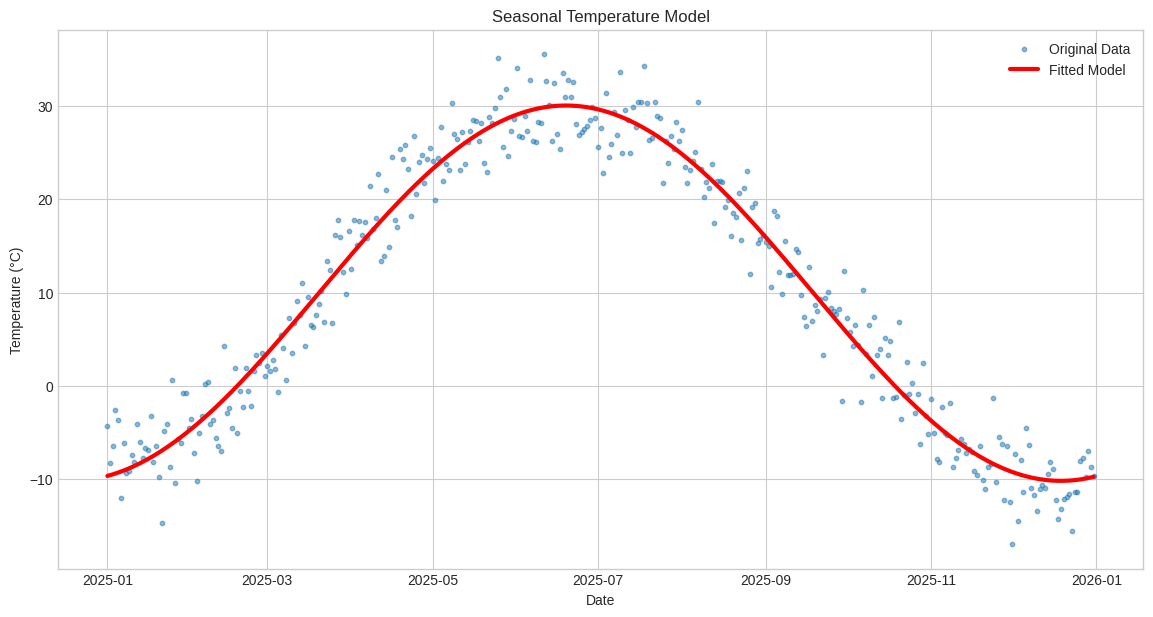

In [30]:
# Your code here
def model_func(x, a, b, c, d):
    """Sinusodial function for seasonal modeling."""
    return a * np.sin(b * x + c) + d


x_data = weather_df_cleaned.index.dayofyear
y_data = weather_df_cleaned["temperature"]

initial_guesses = [20, 2 * np.pi / 365, 0, 10]
params, covariance = optimize.curve_fit(model_func, x_data, y_data, p0=initial_guesses)

print("Fitted paramters (a, b, c, d):", params)

plt.figure(figsize=(14, 7))
plt.scatter(weather_df_cleaned.index, y_data, label="Original Data", alpha=0.5, s=10)
plt.plot(
    weather_df_cleaned.index,
    model_func(x_data, *params),
    color="red",
    linewidth=3,
    label="Fitted Model",
)
plt.title("Seasonal Temperature Model")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

**Solution 5.1:**

In [ ]:
# 1. Define the model function
def model_func(x, a, b, c, d):
    """Sinusoidal function for seasonal modeling."""
    return a * np.sin(b * x + c) + d


# 2. Use curve_fit
x_data = weather_df_cleaned.index.dayofyear
y_data = weather_df_cleaned["temperature"]

# Provide some initial guesses for the parameters to help the optimizer
initial_guesses = [20, 2 * np.pi / 365, 0, 10]
params, covariance = optimize.curve_fit(model_func, x_data, y_data, p0=initial_guesses)

print("Fitted parameters (a, b, c, d):", params)

# 3. Plot the results
plt.figure(figsize=(14, 7))
plt.scatter(weather_df_cleaned.index, y_data, label="Original Data", alpha=0.5, s=10)
plt.plot(
    weather_df_cleaned.index,
    model_func(x_data, *params),
    color="red",
    linewidth=3,
    label="Fitted Model",
)
plt.title("Seasonal Temperature Model")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

### Final Summary

**Exercise 6.1 (Challenge):** In a Markdown cell, write a brief summary (3-4 bullet points) of your key findings from this analysis.

### Solution 6.1:
*   **Seasonal Trends:** The city experiences strong seasonal temperature variations, with a peak in the summer months (June-August) and a low in the winter. This pattern can be modeled effectively with a sinusoidal function.
*   **Precipitation Patterns:** Precipitation is not uniform throughout the year. It is negatively correlated with temperature, with the highest amounts of precipitation occurring in the colder, winter months.
*   **Rain and Temperature:** Days with measurable precipitation are, on average, significantly cooler than dry days, as confirmed by a t-test.
*   **Wind:** Wind speeds are generally moderate, with most days falling in the 10-25 km/h range, and do not show an obvious strong seasonal pattern from the histogram.

---

## Congratulations!

You have successfully completed a data analysis project from start to finish. You have demonstrated your ability to use the core libraries of the Scientific Python stack to handle data, produce insightful visualizations, perform statistical tests, and even create a predictive model. 

From here, you can continue your journey by exploring more advanced topics, tackling more complex datasets from platforms like Kaggle, or diving deeper into specialized libraries like Scikit-learn for machine learning.